## Loading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style="whitegrid")

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Splitting dataset into training and test set

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## Model training and evaluating

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [8]:
sc = ('Scaler', StandardScaler())
pipeline_lr = Pipeline([('LinearRegression', LinearRegression())])
pipeline_rf = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_knn = Pipeline([sc,('KNeighbors', KNeighborsRegressor())])
pipeline_dt = Pipeline([('DecisionTree', DecisionTreeRegressor())])
pipeline_et = Pipeline([('ExtraTrees', ExtraTreesRegressor())])
pipeline_cat = Pipeline([('CatBoost', CatBoostRegressor())])

In [9]:
pipelines = [pipeline_lr, pipeline_rf, pipeline_knn, pipeline_dt, pipeline_et, pipeline_cat]

In [10]:
best_score = 0.0
best_regressor = 0
best_pipeline = ""

In [11]:
pipe_dict = {0:'LinearRegression', 1:'RandomForest', 2:'KNeighbors', 3:'DecisionTree', 4:'ExtraTrees', 5:'CatBoost'}

for pipe in pipelines:
    pipe.fit(x_train,y_train)

Learning rate set to 0.019623
0:	learn: 24412.3933955	total: 55.9ms	remaining: 55.9s
1:	learn: 24161.7688913	total: 56.6ms	remaining: 28.2s
2:	learn: 23903.0468826	total: 57.2ms	remaining: 19s
3:	learn: 23710.9448276	total: 57.9ms	remaining: 14.4s
4:	learn: 23489.4255081	total: 58.4ms	remaining: 11.6s
5:	learn: 23200.3480951	total: 58.8ms	remaining: 9.75s
6:	learn: 23027.5390472	total: 59.4ms	remaining: 8.42s
7:	learn: 22827.6123039	total: 59.9ms	remaining: 7.43s
8:	learn: 22588.9042260	total: 60.4ms	remaining: 6.65s
9:	learn: 22319.1219336	total: 60.9ms	remaining: 6.03s
10:	learn: 22082.1554006	total: 61.3ms	remaining: 5.51s
11:	learn: 21843.2932022	total: 61.8ms	remaining: 5.08s
12:	learn: 21632.3380077	total: 62.3ms	remaining: 4.73s
13:	learn: 21417.1869140	total: 62.8ms	remaining: 4.42s
14:	learn: 21181.5508490	total: 63.3ms	remaining: 4.15s
15:	learn: 20964.8971483	total: 63.8ms	remaining: 3.92s
16:	learn: 20720.2301181	total: 64.1ms	remaining: 3.71s
17:	learn: 20493.5499573	total

245:	learn: 4277.6866998	total: 164ms	remaining: 504ms
246:	learn: 4257.7568452	total: 165ms	remaining: 503ms
247:	learn: 4244.6240484	total: 165ms	remaining: 502ms
248:	learn: 4230.2792803	total: 166ms	remaining: 502ms
249:	learn: 4216.1566024	total: 167ms	remaining: 500ms
250:	learn: 4203.4518416	total: 167ms	remaining: 499ms
251:	learn: 4194.2690600	total: 168ms	remaining: 498ms
252:	learn: 4179.0929927	total: 168ms	remaining: 497ms
253:	learn: 4162.6784332	total: 169ms	remaining: 495ms
254:	learn: 4153.6812354	total: 169ms	remaining: 494ms
255:	learn: 4141.5079908	total: 170ms	remaining: 493ms
256:	learn: 4126.2024553	total: 170ms	remaining: 492ms
257:	learn: 4111.8097412	total: 171ms	remaining: 491ms
258:	learn: 4103.0527165	total: 171ms	remaining: 490ms
259:	learn: 4089.6990039	total: 172ms	remaining: 488ms
260:	learn: 4078.1561141	total: 172ms	remaining: 487ms
261:	learn: 4063.4858992	total: 173ms	remaining: 486ms
262:	learn: 4050.1592943	total: 173ms	remaining: 485ms
263:	learn

539:	learn: 2270.4733347	total: 313ms	remaining: 266ms
540:	learn: 2268.4163907	total: 314ms	remaining: 266ms
541:	learn: 2265.0481797	total: 314ms	remaining: 265ms
542:	learn: 2260.8407783	total: 315ms	remaining: 265ms
543:	learn: 2258.8211611	total: 315ms	remaining: 264ms
544:	learn: 2256.8211231	total: 316ms	remaining: 264ms
545:	learn: 2253.5067942	total: 317ms	remaining: 263ms
546:	learn: 2249.3994933	total: 317ms	remaining: 263ms
547:	learn: 2247.4356736	total: 318ms	remaining: 262ms
548:	learn: 2243.4032530	total: 318ms	remaining: 262ms
549:	learn: 2241.4708107	total: 319ms	remaining: 261ms
550:	learn: 2238.1090953	total: 320ms	remaining: 260ms
551:	learn: 2236.1993272	total: 320ms	remaining: 260ms
552:	learn: 2232.9642881	total: 321ms	remaining: 259ms
553:	learn: 2231.0770482	total: 321ms	remaining: 259ms
554:	learn: 2227.7766544	total: 322ms	remaining: 258ms
555:	learn: 2224.5907954	total: 322ms	remaining: 257ms
556:	learn: 2221.4375177	total: 323ms	remaining: 257ms
557:	learn

848:	learn: 1781.6955475	total: 463ms	remaining: 82.4ms
849:	learn: 1780.8017084	total: 464ms	remaining: 81.8ms
850:	learn: 1780.1364762	total: 464ms	remaining: 81.3ms
851:	learn: 1779.4783327	total: 465ms	remaining: 80.7ms
852:	learn: 1778.8271971	total: 465ms	remaining: 80.2ms
853:	learn: 1777.2183797	total: 466ms	remaining: 79.7ms
854:	learn: 1776.3384597	total: 467ms	remaining: 79.2ms
855:	learn: 1775.6977301	total: 467ms	remaining: 78.6ms
856:	learn: 1775.0638386	total: 468ms	remaining: 78.1ms
857:	learn: 1773.4918816	total: 468ms	remaining: 77.5ms
858:	learn: 1772.6259774	total: 469ms	remaining: 77ms
859:	learn: 1772.0022187	total: 470ms	remaining: 76.4ms
860:	learn: 1771.3851318	total: 470ms	remaining: 75.9ms
861:	learn: 1769.8491278	total: 471ms	remaining: 75.3ms
862:	learn: 1769.2422630	total: 471ms	remaining: 74.8ms
863:	learn: 1767.7330620	total: 472ms	remaining: 74.2ms
864:	learn: 1766.2466710	total: 472ms	remaining: 73.7ms
865:	learn: 1765.7291489	total: 473ms	remaining: 7

In [12]:
for i,model in enumerate (pipelines):
    print("{}, R2 Score: {}".format(pipe_dict[i],model.score(x_test,y_test)))

LinearRegression, R2 Score: 0.9740993407213511
RandomForest, R2 Score: 0.9508534643763915
KNeighbors, R2 Score: 0.9402308001226181
DecisionTree, R2 Score: 0.9263756616003317
ExtraTrees, R2 Score: 0.9574885657844464
CatBoost, R2 Score: 0.9363285554427978


In [13]:
for i, model in enumerate(pipelines):
    if model.score(x_test,y_test) > best_score:
        best_score = model.score(x_test,y_test)
        best_pipeline = model
        best_regressor = i

print('Regressor with best score: {}'.format(pipe_dict[best_regressor]))

Regressor with best score: LinearRegression


In [14]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = reg.predict(x_test)

## Visualising Training & Test results

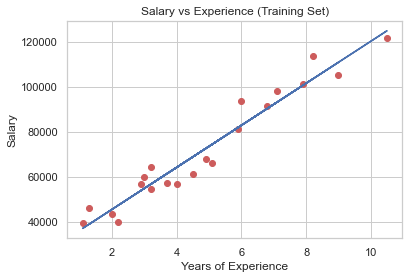

In [16]:
plt.scatter(x_train, y_train, color = 'indianred')
plt.plot(x_train, reg.predict(x_train))
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

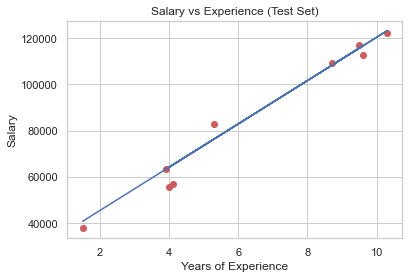

In [17]:
plt.scatter(x_test, y_test, color = 'indianred')
plt.plot(x_test, y_pred)
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()